# Team Drug Fall 24 Exploratory Data Analysis


## Setting Up for Full EDA

In [13]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import plotly.express as px



In [14]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium



In [15]:
# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [16]:
#Reading data
df = pd.read_csv("Medical_Examiner_Case_Archive.csv", low_memory= False)
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,...,Incident Zip Code,longitude,latitude,location,Residence City,Residence Zip,OBJECTID,Chicago Ward,Chicago Community Area,COVID Related
0,ME2020-05711,05/15/2020 06:00:00 PM,05/15/2020 10:52:00 PM,67.0,Female,White,False,PENDING,NaN,NaN,...,60666,NaN,NaN,NaN,NaN,NaN,38479,NaN,NaN,NaN
1,ME2014-00627,09/21/2014 10:00:00 AM,09/21/2014 01:50:00 PM,25.0,Male,Black,False,UNDETERMINED,DROWNING,DROWNING,...,NaN,-87.615461,41.889480,"(41.88948019, -87.61546076)",NaN,60608,1,42.0,NEAR NORTH SIDE,False
2,ME2014-00649,09/22/2014 04:40:00 PM,09/22/2014 04:55:00 PM,61.0,Male,Black,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,...,60411,-87.623221,41.507334,"(41.507334, -87.6232215)",NaN,60411,2,NaN,NaN,False
3,ME2014-00712,09/27/2014 04:58:00 PM,09/27/2014 05:10:00 PM,51.0,Male,White,False,NATURAL,DIABETIC KETOACIDOSIS,DIABETIC KETOACIDOSIS,...,60525,NaN,NaN,NaN,NaN,60525,3,NaN,NaN,False
4,ME2014-00792,10/02/2014 12:00:00 AM,10/02/2014 02:15:00 PM,55.0,Male,Black,False,NATURAL,HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...,HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,False


In [17]:
#Checking rows and columns
print('Number of Rows:',df.shape[0])

Number of Rows: 85049


In [18]:
#Filtering Data to only look at Drug Related Deaths
filtered = df[(df['COVID Related'] == False) & (df['Opioid Related'] == True)]
print('Number of Rows:',len(filtered))
filtered

Number of Rows: 14083


,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,...,Incident Zip Code,longitude,latitude,location,Residence City,Residence Zip,OBJECTID,Chicago Ward,Chicago Community Area,COVID Related
16,ME2014-01698,12/01/2014 12:00:00 AM,12/01/2014 10:10:00 AM,51.0,Male,Black,False,ACCIDENT,ACUTE HEROIN TOXICITY,ACUTE HEROIN TOXICITY,...,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,False
19,ME2014-01798,12/08/2014 10:30:00 AM,12/08/2014 11:00:00 AM,39.0,Male,White,False,ACCIDENT,COCAINE AND HEROIN TOXICITY,COCAINE AND HEROIN TOXICITY,...,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,False
27,ME2015-00194,01/12/2015 09:00:00 PM,01/13/2015 11:30:00 AM,49.0,Male,Black,False,ACCIDENT,ACUTE BRONCHIAL ASTHMA,ACUTE BRONCHIAL ASTHMA,...,NaN,-87.717236,41.894613,"(41.894613, -87.7172355)",NaN,NaN,27,27.0,HUMBOLDT PARK,False
35,ME2015-00649,02/14/2015 05:00:00 AM,02/14/2015 06:40:00 AM,48.0,Female,Black,False,ACCIDENT,ACUTE HEROIN TOXICITY.,ACUTE HEROIN TOXICITY.,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,False
51,ME2015-01249,03/26/2015 07:20:00 AM,03/26/2015 08:14:00 AM,48.0,Male,Black,False,ACCIDENT,COMBINED DRUG (HEROIN AND COCAINE) TOXICITY,COMBINED DRUG (HEROIN AND COCAINE) TOXICITY,...,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84662,ME2024-05043,09/14/2024 12:49:00 PM,09/14/2024 12:19:00 PM,22.0,Male,Black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND DESPROPIONYL FENTA...,COMBINED DRUG (FENTANYL AND DESPROPIONYL FENTA...,...,60623,-87.715260,41.850324,"(41.850324, -87.71526)",Chicago,60623,84744,22.0,SOUTH LAWNDALE,False
84670,ME2024-05063,09/06/2024 06:55:00 PM,09/15/2024 04:59:00 PM,39.0,Male,White,False,ACCIDENT,COMPLICATIONS OF ETHANOL AND COMBINED DRUG (FE...,COMPLICATIONS OF ETHANOL AND COMBINED DRUG (FE...,...,00000,NaN,NaN,NaN,Chicago,60605,84752,NaN,NaN,False
84795,ME2024-05191,08/18/2024 11:30:00 PM,09/20/2024 11:14:00 PM,41.0,Male,White,True,ACCIDENT,COMPLICATIONS OF PROBABLE OPIOID INTOXICATION,COMPLICATIONS OF PROBABLE OPIOID INTOXICATION,...,60624,-87.718099,41.873535,"(41.873535, -87.7180995)",Chicago,60645,84877,24.0,EAST GARFIELD PARK,False
85006,ME2024-05406,03/30/2024 04:47:00 AM,10/02/2024 03:40:00 AM,37.0,Male,White,False,ACCIDENT,"COMPLICATIONS OF COCAINE, FENTANYL, AND ETHANO...","COMPLICATIONS OF COCAINE, FENTANYL, AND ETHANO...",...,NaN,NaN,NaN,NaN,NaN,NaN,85088,NaN,NaN,False


In [19]:
print(filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14083 entries, 16 to 85037
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             14083 non-null  object 
 1   Date of Incident        13929 non-null  object 
 2   Date of Death           14083 non-null  object 
 3   Age                     14074 non-null  float64
 4   Gender                  14083 non-null  object 
 5   Race                    14077 non-null  object 
 6   Latino                  14083 non-null  bool   
 7   Manner of Death         14083 non-null  object 
 8   Primary Cause           14083 non-null  object 
 9   Primary Cause Line A    14083 non-null  object 
 10  Primary Cause Line B    1146 non-null   object 
 11  Primary Cause Line C    43 non-null     object 
 12  Secondary Cause         1538 non-null   object 
 13  Gun Related             14083 non-null  object 
 14  Opioid Related          14083 non-null  ob

In [20]:
# Converts size in bytes to a more readable format (KB, etc)
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

# Checking some statistics
print("Number of Variables: " + str(len(filtered.columns)))
print("Number of Observations: " + str(filtered.shape[0]))
print("Number of Duplicate Rows: " + str(filtered.duplicated().sum()))
print("Memory Size: " + str(convert_size(filtered.memory_usage(index=True, deep=True).sum())))
print("Number of Missing Values in each Column: \n" + str(filtered.isna().sum()))

Number of Variables: 30
Number of Observations: 14083
Number of Duplicate Rows: 0
Memory Size: 17.21 MB
Number of Missing Values in each Column: 
Case Number                   0
Date of Incident            154
Date of Death                 0
Age                           9
Gender                        0
Race                          6
Latino                        0
Manner of Death               0
Primary Cause                 0
Primary Cause Line A          0
Primary Cause Line B      12937
Primary Cause Line C      14040
Secondary Cause           12545
Gun Related                   0
Opioid Related                0
Cold Related                  0
Heat Related                  0
Commissioner District       887
Incident Address             51
Incident City                63
Incident Zip Code           198
longitude                   887
latitude                    887
location                    887
Residence City              504
Residence Zip               510
OBJECTID              

In [21]:
filtered = filtered[filtered['Residence Zip'].isna()]
df = filtered.dropna(subset=['location'])

# Initialize Geolocator
geolocator = Nominatim(user_agent="zip_code_locator")
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Function to get ZIP code from coordinates
def get_zip_from_coords(row):
    if pd.isna(row['Residence Zip']) and pd.notna(row['latitude']) and pd.notna(row['longitude']):
        location = geocode((row['latitude'], row['longitude']), exactly_one=True)
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
    return row['Residence Zip']  # Keep existing ZIP code if present or if coordinates are missing

# Apply function to each row to update Residence Zip
df['Residence Zip'] = df.apply(get_zip_from_coords, axis=1)

KeyboardInterrupt: 

In [22]:
#Making a copy of the data to manipulate
df_copy = df.copy()
df_copy

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,...,Incident Zip Code,longitude,latitude,location,Residence City,Residence Zip,OBJECTID,Chicago Ward,Chicago Community Area,COVID Related
27,ME2015-00194,01/12/2015 09:00:00 PM,01/13/2015 11:30:00 AM,49.0,Male,Black,False,ACCIDENT,ACUTE BRONCHIAL ASTHMA,ACUTE BRONCHIAL ASTHMA,...,NaN,-87.717236,41.894613,"(41.894613, -87.7172355)",NaN,NaN,27,27.0,HUMBOLDT PARK,False
162,ME2019-01301,03/21/2019 11:15:00 PM,03/22/2019 12:20:00 AM,43.0,Male,White,False,ACCIDENT,"COMBINED COCAINE, FENTANYL, ACETYL FENTANYL, A...","COMBINED COCAINE, FENTANYL, ACETYL FENTANYL, A...",...,60647,-87.708470,41.931693,"(41.931693, -87.7084695)",NaN,NaN,162,35.0,LOGAN SQUARE,False
782,ME2014-00244,08/27/2014 10:06:00 AM,08/27/2014 10:17:00 AM,51.0,Female,White,False,ACCIDENT,"TRAMADOL, AMITRIPTYLINE, CITALOPRAM, AND LORAZ...","TRAMADOL, AMITRIPTYLINE, CITALOPRAM, AND LORAZ...",...,60194,-88.080466,42.009732,"(42.009732, -88.0804665)",NaN,NaN,782,NaN,NaN,False
965,ME2017-04161,09/05/2017 07:40:00 PM,09/05/2017 08:40:00 PM,37.0,Male,White,True,ACCIDENT,ALPRAZOLAM AND FENTANYL TOXICITY,ALPRAZOLAM AND FENTANYL TOXICITY,...,60614,-87.658987,41.931684,"(41.931684, -87.6589875)",Chicago,NaN,965,32.0,LINCOLN PARK,False
979,ME2014-00751,09/16/2014 04:11:00 PM,09/30/2014 05:21:00 AM,56.0,Male,White,False,ACCIDENT,SEPSIS. METHICILLIN RESISTANT STAPHYLOCOCCUS A...,SEPSIS,...,60616,-87.631906,41.857785,"(41.857785, -87.6319065)",NaN,NaN,979,11.0,NEAR SOUTH SIDE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83373,ME2024-03767,07/10/2024 04:11:00 PM,07/10/2024 02:11:00 PM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, FENTANYL, AND 4-ANPP (...","COMBINED DRUG (COCAINE, FENTANYL, AND 4-ANPP (...",...,60624,-87.712398,41.892039,"(41.892039, -87.712398)",NaN,NaN,83453,27.0,HUMBOLDT PARK,False
83825,ME2024-04221,08/02/2024 08:33:00 AM,08/02/2024 07:58:00 AM,62.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND PROBABLE N-PYRROLID...,COMBINED DRUG (COCAINE AND PROBABLE N-PYRROLID...,...,60612,-87.667079,41.876631,"(41.876631, -87.6670785)",NaN,NaN,83905,34.0,NEAR WEST SIDE,False
83841,ME2024-04234,08/02/2024 07:58:00 PM,08/02/2024 07:15:00 PM,22.0,Male,Black,False,ACCIDENT,"COMBINED DRUG (COCAINE, FENTANYL, AND DESPROPI...","COMBINED DRUG (COCAINE, FENTANYL, AND DESPROPI...",...,60619,-87.605491,41.748102,"(41.748102, -87.6054915)",CHICAGO,NaN,83921,6.0,CHATHAM,False
83864,ME2024-04262,08/03/2024 12:44:00 AM,08/03/2024 10:22:00 PM,49.0,Male,White,False,ACCIDENT,FENTANYL TOXICITY,FENTANYL TOXICITY,...,60076,-87.711462,42.011838,"(42.011838, -87.711462)",NaN,NaN,83944,NaN,NaN,False


## Univariate EDA

### Countplots

In [23]:
#Making function for Countplots

def countplot(data, col):
    count = sns.countplot(data=data, x=col)
    total = len(data[col])

    for p in count.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        count.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()

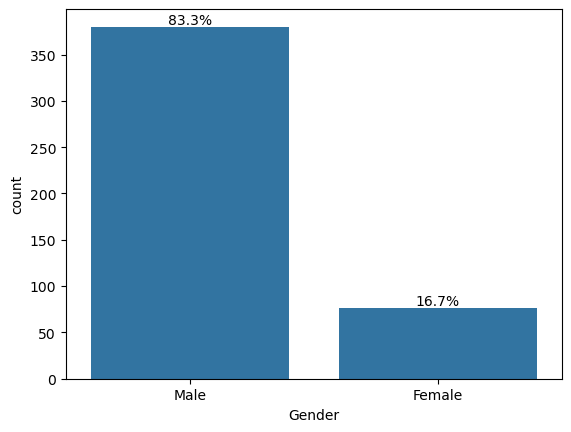

In [24]:
countplot(df_copy, "Gender")

#### Interpretation
Over 75% of Drug Deaths occur from Males. 

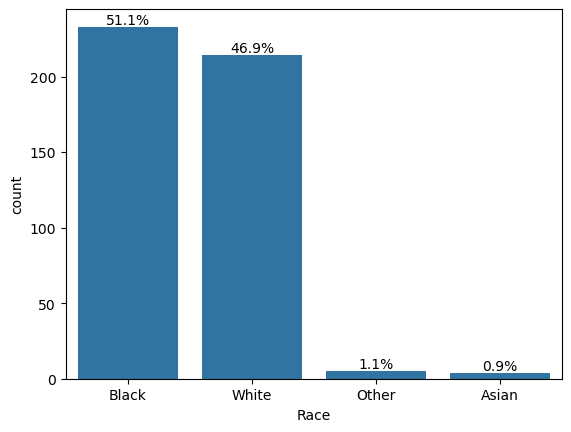

In [25]:
countplot(df_copy, "Race")

#### Interpretation

* Vast majority of deaths are from white and black individuals. 
* These groups may have higher access to Drugs in their communities
* Other races have VERY little prevalence in drug related deaths

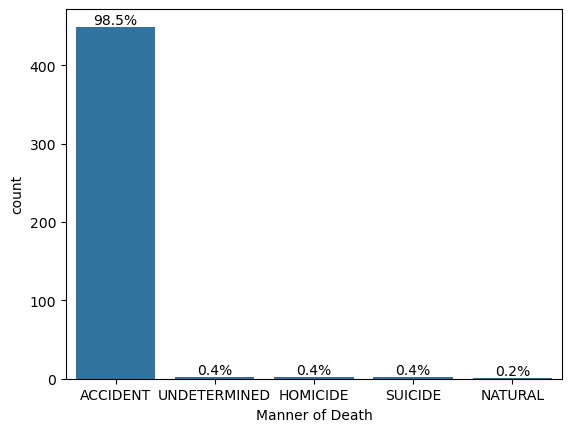

In [26]:
countplot(df_copy, "Manner of Death")

#### Interpretation
* Majority of the deaths from Drugs were accidental. 
* Person could have taken too much on their own, or could have gotten drugged. 

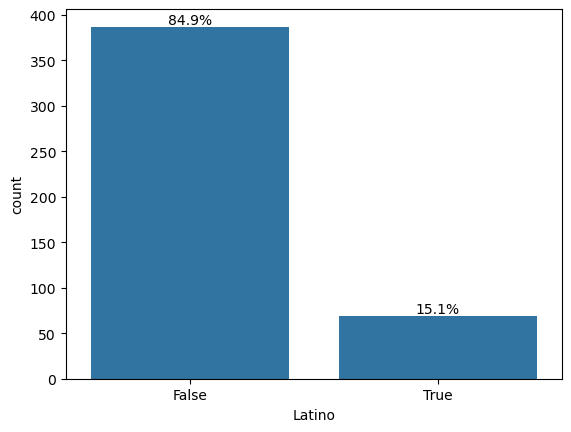

In [27]:
countplot(df_copy, "Latino")

#### Interpretation

* Majority of Deaths weren't Latinos, however there still is a considerable amount. 

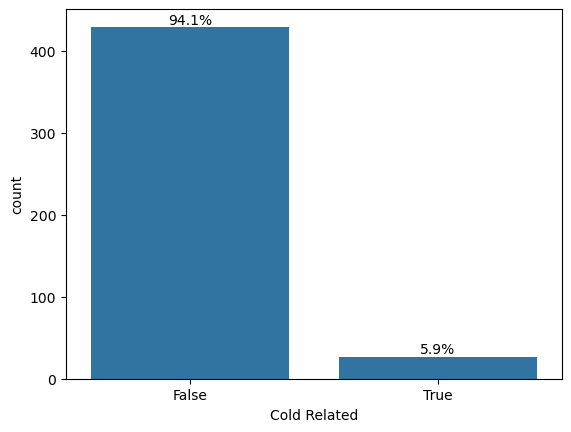

In [28]:
countplot(df_copy, 'Cold Related')

#### Interpretation

* About 99% of the deaths were not related to the cold
* There is potential to drop this column in final prediction, but most likely not

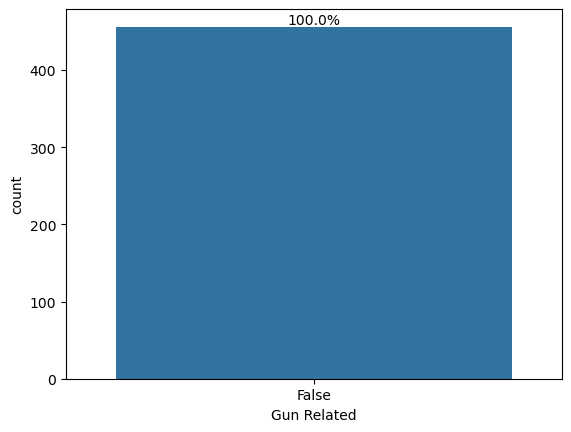

In [29]:
countplot(df_copy, 'Gun Related')

#### Interpretation

* This could be a column to be dropped
* From earlier analysis, this column has 2 unique outputs. 

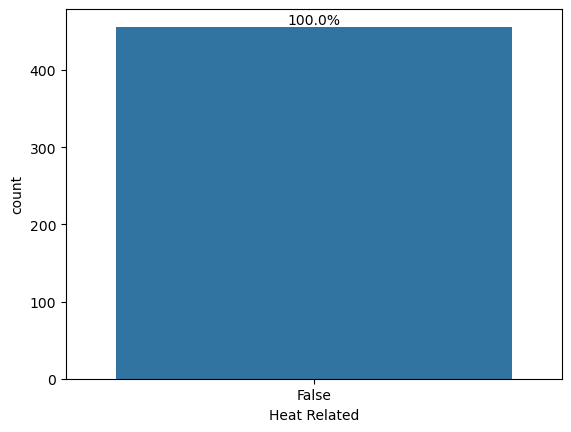

In [30]:
countplot(df_copy, 'Heat Related')

#### Interpretation

* This could be a column to be dropped
* From earlier analysis, this column has 2 unique outputs. 

### Boxplot and Histogram

In [31]:
# Code to make box plot and histogram
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist, bins=20)
    plt.show()

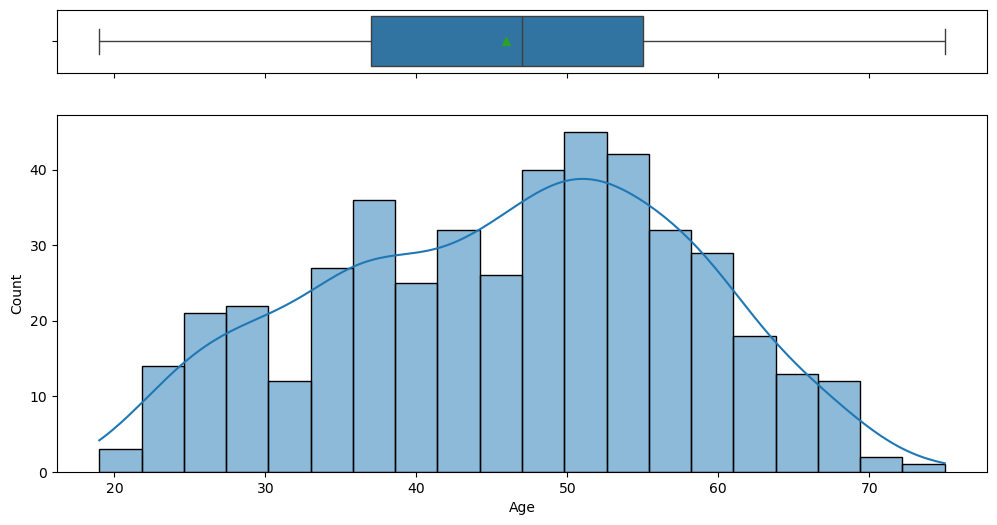

In [32]:
hist_box(df_copy, "Age")

#### Interpretation

* The middle 50% of deaths are occurring between ~ 37 - 57 years old
* Some outliers exist around 0-3 years old and 95-98 years old. 
* Histogram is very slightly skewed left, fitting the overall trend that most deaths are for the middle age population
* It seems some deaths are occurring before 21 years of age, which could mean illegal drug selling, or other explanations
* There is a relatively sharp drop-off of number of deaths after about 64 years old. 

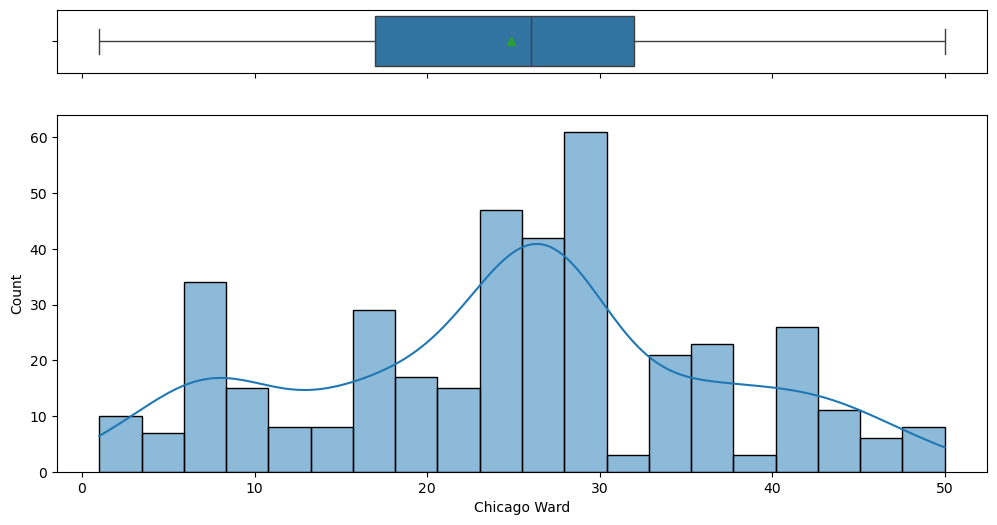

In [33]:
hist_box(df_copy, "Chicago Ward")

### Statistics of Columns

In [34]:
# Renaming Columns for ease of filtering

df_copy = df_copy.rename(columns = {'Manner of Death' : 'Manner_of_Death', 'Primary Cause' : 'Primary_Cause','Incident Zip Code' : 'Incident_Zip', 
                                    'Residence Zip' : 'Residence_Zip', 'Residence City' : 'Residence_City', 
                                    'Chicago Ward' : 'Chicago_Ward', 'Chicago Community Area' : 'Chi_Community_Area', 'Incident City': 'Incident_City',
                                    'Commissioner District' : 'Commissioner_District', 'Primary Cause Line A' : 'Primary_Cause_A', 
                                    'Gun Related' : 'Gun_Related', 'Date of Incident' : 'Incident_Date', 'Date of Death' : 'Death_Date',
                                    'Secondary Cause' : 'Secondary_Cause'})

df_copy

,Case Number,Incident_Date,Death_Date,Age,Gender,Race,Latino,Manner_of_Death,Primary_Cause,Primary_Cause_A,...,Incident_Zip,longitude,latitude,location,Residence_City,Residence_Zip,OBJECTID,Chicago_Ward,Chi_Community_Area,COVID Related
27,ME2015-00194,01/12/2015 09:00:00 PM,01/13/2015 11:30:00 AM,49.0,Male,Black,False,ACCIDENT,ACUTE BRONCHIAL ASTHMA,ACUTE BRONCHIAL ASTHMA,...,NaN,-87.717236,41.894613,"(41.894613, -87.7172355)",NaN,NaN,27,27.0,HUMBOLDT PARK,False
162,ME2019-01301,03/21/2019 11:15:00 PM,03/22/2019 12:20:00 AM,43.0,Male,White,False,ACCIDENT,"COMBINED COCAINE, FENTANYL, ACETYL FENTANYL, A...","COMBINED COCAINE, FENTANYL, ACETYL FENTANYL, A...",...,60647,-87.708470,41.931693,"(41.931693, -87.7084695)",NaN,NaN,162,35.0,LOGAN SQUARE,False
782,ME2014-00244,08/27/2014 10:06:00 AM,08/27/2014 10:17:00 AM,51.0,Female,White,False,ACCIDENT,"TRAMADOL, AMITRIPTYLINE, CITALOPRAM, AND LORAZ...","TRAMADOL, AMITRIPTYLINE, CITALOPRAM, AND LORAZ...",...,60194,-88.080466,42.009732,"(42.009732, -88.0804665)",NaN,NaN,782,NaN,NaN,False
965,ME2017-04161,09/05/2017 07:40:00 PM,09/05/2017 08:40:00 PM,37.0,Male,White,True,ACCIDENT,ALPRAZOLAM AND FENTANYL TOXICITY,ALPRAZOLAM AND FENTANYL TOXICITY,...,60614,-87.658987,41.931684,"(41.931684, -87.6589875)",Chicago,NaN,965,32.0,LINCOLN PARK,False
979,ME2014-00751,09/16/2014 04:11:00 PM,09/30/2014 05:21:00 AM,56.0,Male,White,False,ACCIDENT,SEPSIS. METHICILLIN RESISTANT STAPHYLOCOCCUS A...,SEPSIS,...,60616,-87.631906,41.857785,"(41.857785, -87.6319065)",NaN,NaN,979,11.0,NEAR SOUTH SIDE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83373,ME2024-03767,07/10/2024 04:11:00 PM,07/10/2024 02:11:00 PM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, FENTANYL, AND 4-ANPP (...","COMBINED DRUG (COCAINE, FENTANYL, AND 4-ANPP (...",...,60624,-87.712398,41.892039,"(41.892039, -87.712398)",NaN,NaN,83453,27.0,HUMBOLDT PARK,False
83825,ME2024-04221,08/02/2024 08:33:00 AM,08/02/2024 07:58:00 AM,62.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND PROBABLE N-PYRROLID...,COMBINED DRUG (COCAINE AND PROBABLE N-PYRROLID...,...,60612,-87.667079,41.876631,"(41.876631, -87.6670785)",NaN,NaN,83905,34.0,NEAR WEST SIDE,False
83841,ME2024-04234,08/02/2024 07:58:00 PM,08/02/2024 07:15:00 PM,22.0,Male,Black,False,ACCIDENT,"COMBINED DRUG (COCAINE, FENTANYL, AND DESPROPI...","COMBINED DRUG (COCAINE, FENTANYL, AND DESPROPI...",...,60619,-87.605491,41.748102,"(41.748102, -87.6054915)",CHICAGO,NaN,83921,6.0,CHATHAM,False
83864,ME2024-04262,08/03/2024 12:44:00 AM,08/03/2024 10:22:00 PM,49.0,Male,White,False,ACCIDENT,FENTANYL TOXICITY,FENTANYL TOXICITY,...,60076,-87.711462,42.011838,"(42.011838, -87.711462)",NaN,NaN,83944,NaN,NaN,False


In [38]:

# Assume df_copy is your original dataframe
df_age = df_copy['Age'].value_counts().head(20) // 5

# Convert the Series to a DataFrame
df_age = df_age.to_frame(name='Count')

# Ensure the index is numeric (if it's not, convert it)
df_age.index = df_age.index.astype(float)  # or int if appropriate

# Cast the max age to int before using in range
max_age = int(df_age.index.max())

# Define bins and labels for age buckets
bins = range(0, max_age + 6, 5)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

# Add a new column for age buckets (using df_age.index)
df_age['Age_Bucket'] = pd.cut(df_age.index, bins=bins, labels=labels, right=False)

# Group by Age_Bucket and aggregate values
grouped_df = df_age.groupby('Age_Bucket').sum()

# Calculate the total count
total_count = grouped_df['Count'].sum()

# Create a new column for proportions
grouped_df['Proportion'] = grouped_df['Count'] / total_count

# If you'd like percentages instead of proportions, you can do:
grouped_df['Percentage'] = grouped_df['Proportion'] * 100

grouped_df.drop(columns=["Count","Proportion"])


C:\Users\bdscu\AppData\Local\Temp\ipykernel_25084\3004768138.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_age.groupby('Age_Bucket').sum()


,Percentage
Age_Bucket,
0-4,0.000000
5-9,0.000000
10-14,0.000000
15-19,0.000000
20-24,0.000000
25-29,4.255319
30-34,4.255319
35-39,17.021277
40-44,4.255319


#### Interpretation
* The first 10 values show the most deaths occurring between the ages of 49 to 58, with the largest proportion dying at age 56. 
* Overall, the top 20 ages of drug related deaths occur from 40 years old to 60 years old.

In [ ]:
# * ### Observation

#df_age = df_copy.Age.value_counts().head(20)

#print(df_age)

In [ ]:
df_inc_zip = df_copy.Incident_Zip.value_counts().head(10)

print(df_inc_zip)

Incident_Zip
60624    44
60612    27
60623    25
60651    23
60619    15
60607    15
60628    14
60622    14
60637    14
60644    13
Name: count, dtype: int64


#### Interpretation

* The top 5 Incident Zip-Codes are--
    * 60624
    * 60644
    * 60651
    * 60612
    * 60623
* The highest proportion of incidents occurred in the Chicago Zip Code 60624. 
    * This value is more than 200 higher than the next Zip Code of 60644
    * This suggests some factors are affecting 60624 a lot more than other Zip Codes

In [ ]:
df_inc_city = df_copy.Incident_City.value_counts().head(10)

print(df_inc_city)

Incident_City
CHICAGO          392
HARVEY             6
OAK PARK           6
CICERO             6
BRIDGEVIEW         4
MAYWOOD            4
ROSEMONT           3
BLUE ISLAND        2
FRANKLIN PARK      2
DOLTON             2
Name: count, dtype: int64


#### Interpretation

* Vast Majority of the Deaths are within "Chicago" city limits
* About 20% of the deaths have occurred in the suburbs of Chicago

In [ ]:
df_cause = df_copy.Primary_Cause.value_counts().head(50)

print(df_cause)

Primary_Cause
FENTANYL TOXICITY                                                                                      10
HEROIN TOXICITY                                                                                         9
COMBINED DRUG (FENTANYL AND 4-ANPP (DESPROPIONYL FENTANYL)) TOXICITY                                    6
FENTANYL AND COCAINE TOXICITY                                                                           6
FENTANYL AND HEROIN TOXICITY                                                                            5
COMBINED DRUG (COCAINE, FENTANYL, AND DESPROPIONYL FENTANYL [4-ANPP]) TOXICITY                          5
COMBINED DRUG (FENTANYL AND DESPROPIONYL FENTANYL) TOXICITY                                             4
COMBINED DRUG (HEROIN AND FENTANYL) TOXICITY                                                            4
HEROIN AND ETHANOL TOXICITY                                                                             4
COMBINED DRUG (FENTANYL, DESPROP

#### Interpretation

* The greatest proportion of deaths occurred from Fentanyl or Heroin Toxicity alone. 
* Majority of other deaths occurred from a combination of different drugs, which include:
    * Fentanyl 
    * Despropionyl Fentanyl
    * Cocaine
    * Heroin
    * Methadone
    * Ethanol
    * Opiates
    * Opioids

In [ ]:
df_chi_ward = df_copy.Chicago_Ward.value_counts().head(15)

print(df_chi_ward)

Chicago_Ward
28.0    49
27.0    33
24.0    32
37.0    20
20.0    17
42.0    16
16.0    16
25.0    15
8.0     13
9.0     13
7.0     11
34.0    10
41.0    10
6.0     10
17.0    10
Name: count, dtype: int64


#### Interpretation

* Ward 28 shows the greatest proportion of deaths with over 900 people
* Wards 24 and 27 have about 300 less deaths than Ward 28
* Something could be happening within Ward 28 to have elevated numbers. 

In [ ]:
df_sec_cause = df_copy.Secondary_Cause.value_counts().head(15)

print(df_sec_cause)

Secondary_Cause
COLD EXPOSURE                                                                                               9
PROBABLE COLD EXPOSURE                                                                                      8
PROBABLE ENVIRONMENTAL COLD EXPOSURE                                                                        4
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                         4
RECENT COCAINE USE                                                                                          3
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                                     2
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                        2
COMBINED DRUG (COCAINE AND FENTANYL) TOXICITY                                                               1
PROBABLE COLD EXPOSURE AND COCAINE AND FENTANYL INTOXICATION                                            

#### Interpretation

* From previous analysis above, only about 10% of deaths had a secondary cause
* In the first 15 most common secondary causes, heart and lung conditions were very prevalent
    * These include Hypertension, Atherosclerosis, Cardiovascular and Pulmonary disease, and Asthma.
* Few deaths were attributed to cold exposure as well. 

In [ ]:
df_com_dist = df_copy.Commissioner_District.value_counts().head(15)

print(df_com_dist)

Commissioner_District
2.0     110
1.0      86
3.0      46
7.0      42
4.0      26
8.0      24
5.0      22
10.0     21
12.0     16
16.0     16
11.0     14
13.0      8
6.0       8
9.0       7
17.0      7
Name: count, dtype: int64


#### Interpretation

* The districts with the highest proportions of deaths were the first and second district. 
* The next third largest proportion of deaths came from district 3. 
* There could be something going on with the first 2 districts which explains why they have so many more deaths than other districts. 

In [ ]:
df_res_city = df_copy.Residence_City.value_counts().head(15)

print(df_res_city)

Residence_City
Chicago           28
CHICAGO            9
La Grange Park     1
BERWYN TWP         1
Dixmoor            1
Franklin Park      1
Oak Park           1
Niles              1
Harvey             1
Name: count, dtype: int64


#### Interpretation

* Majority of the deceased live within Chicago boundaries
* A good portion also lived in the suburbs of Chicago

## Multivariate EDA

### Graphs

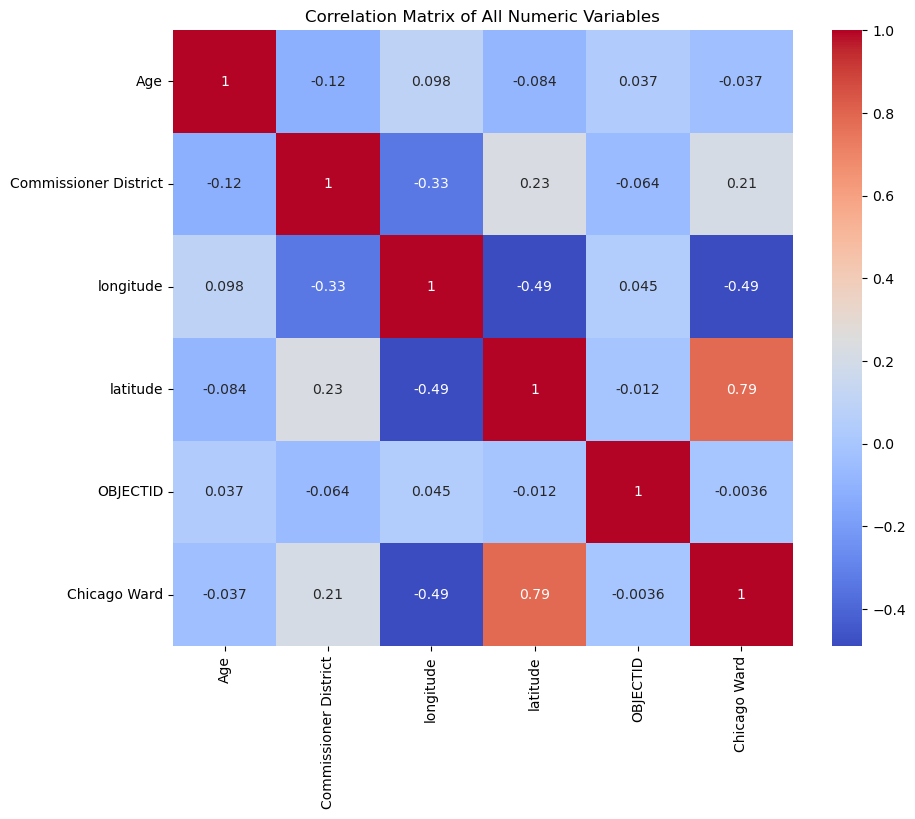

In [ ]:
# creating numeric dataframe
numeric_df = df.select_dtypes(include=np.number)

# correlation between numerical variables
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Numeric Variables')
plt.show()

#### Interpretation
* Latitude and Chicago Ward have a high, positive relationship with each other. This could mean higher ward numbers correlate with higher (farther north) latitude coordinates.
* Latitude and longitude have a moderate, negative relationship with each other. As we move south, the coordinates seem to move east.
* Other variables seem to havbe a weak correlation wtih each other

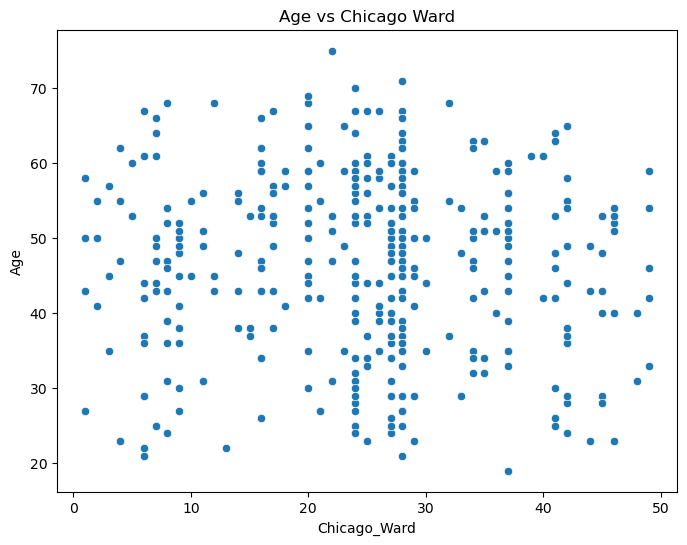

In [ ]:
# Analyzing relationship between ward and age
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_copy, x='Chicago_Ward', y='Age')
plt.title('Age vs Chicago Ward')
plt.show()

#### Interpretation
There does not seem to be a correlation between Chicago Ward and age.

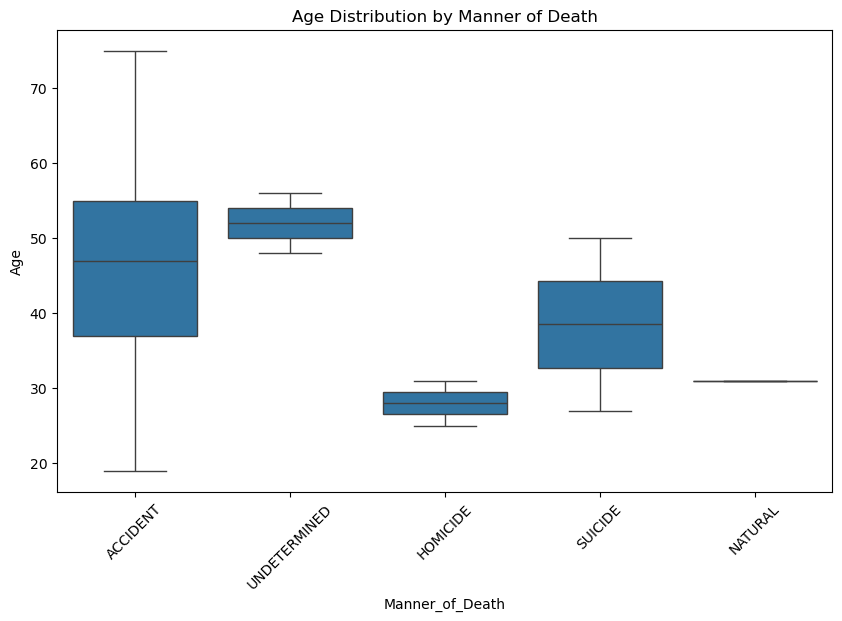

In [ ]:
# Analyzing relationship between manner of death and age
plt.figure(figsize=(10,6))
sns.boxplot(data=df_copy, x='Manner_of_Death', y='Age')
plt.title('Age Distribution by Manner of Death')
plt.xticks(rotation=45)
plt.show()

#### Interpretation
With the IQRs spread apart, there does not seem to be a strong relationship between manner of death and age. However, this graph does give us some significant insights.
* The median age of accidental deaths is around 47-years-old. However, the overall range stretches about 60 years. This makes sense since accidental deaths can happen at any age.
* The median age for undetermined deaths is around 52-years-old.
* The median age for homicides is around 28-years-old. This may insinuate crime rates are higher around this age.
* The median age for suicides around 39-years-old.
* The median age for natural deaths is around 32-years-old. This seems very young for natural deaths.

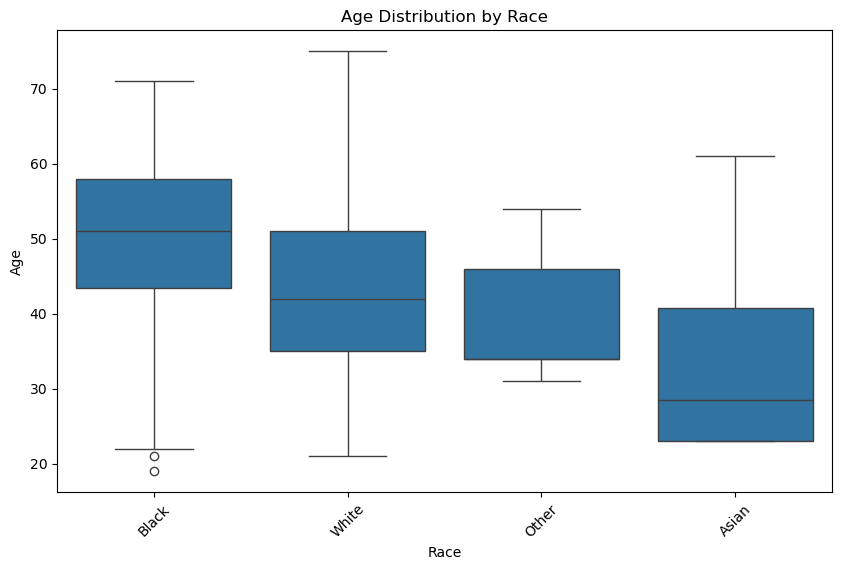

In [ ]:
# Analyzing relationship between race and age
plt.figure(figsize=(10,6))
sns.boxplot(data=df_copy, x='Race', y='Age')
plt.title('Age Distribution by Race')
plt.xticks(rotation=45)
plt.show()

#### Interpretation
Since the IQRs are not well-separated, there seems to be a correlation between race and age.

The medians are as follows:
* Black - 51-years-old
* White - 41-years-old
* Other - ?
* Asian - 28-years-old

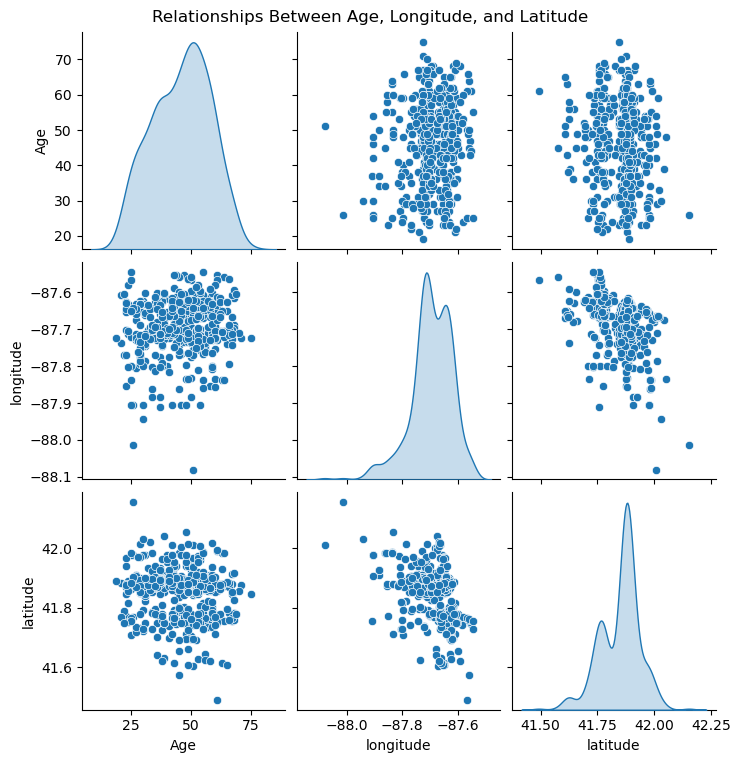

In [ ]:
# Analyzing relationship between age, longitude, and latitude
sns.pairplot(df_copy[['Age', 'longitude', 'latitude']], diag_kind='kde')
plt.suptitle("Relationships Between Age, Longitude, and Latitude", y = 1.01)
plt.show()

#### Interpretation

### Geographical Analysis

In [ ]:
# creating incident map
base_map = folium.Map(location=[df_copy['latitude'].mean(), df_copy['longitude'].mean()], zoom_start=10)

for _, row in df_copy.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='red' if row['Manner_of_Death'] == 'ACCIDENT' else 'blue',
        fill=True,
        fill_color='red' if row['Manner_of_Death'] == 'ACCIDENT' else 'blue',
        popup=f"Age: {row['Age']}, Cause: {row['Primary_Cause']}"
    ).add_to(base_map)

base_map.save('incident_map.html')
base_map

#### Interpretation

In [ ]:
# creating a heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df_copy.iterrows()]
heat_map = folium.Map(location=[df_copy['latitude'].mean(), df_copy['longitude'].mean()], zoom_start=10)
HeatMap(heat_data).add_to(heat_map)
heat_map.save('heatmap.html')
heat_map

#### Interpretation

### Temporal Patterns

C:\Users\bdscu\AppData\Local\Temp\ipykernel_24868\3821720810.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Incident_Date'] = pd.to_datetime(df_copy['Incident_Date'], errors='coerce')


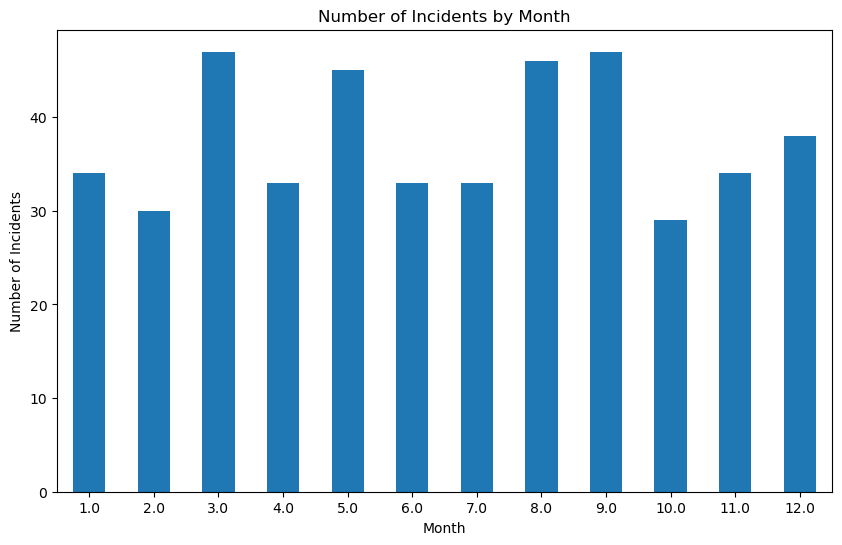

In [ ]:
# converting incident date to datetime format
df_copy['Incident_Date'] = pd.to_datetime(df_copy['Incident_Date'], errors='coerce')

# incidents per month
df_copy['Incident Month'] = df_copy['Incident_Date'].dt.month
month_counts = df_copy['Incident Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar')
plt.title("Number of Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=0)
plt.show()

#### Interpretation

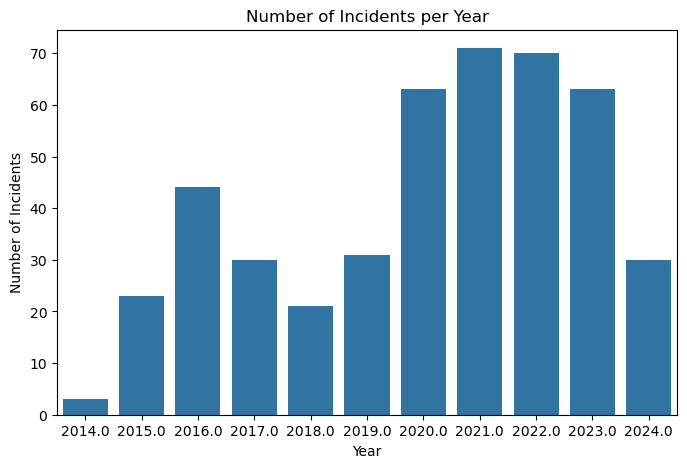

In [ ]:
# incidents per year
df_copy['Incident Year'] = df_copy['Incident_Date'].dt.year
cleaned_year = df_copy[['Incident Year']].dropna()
cleaned_year

plt.figure(figsize=(8,5))
sns.countplot(data=cleaned_year, x='Incident Year', order=sorted(cleaned_year['Incident Year'].unique()))
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

#### Interpretation

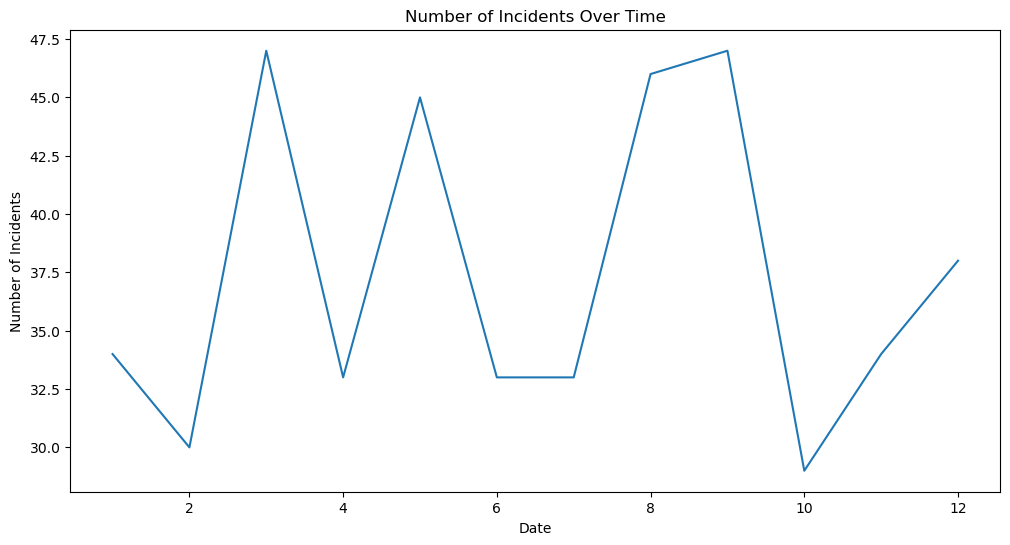

In [ ]:
df_copy['Incident_Month'] = df_copy['Incident_Date'].dt.to_period("M")
incident_counts = df_copy['Incident Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
incident_counts.plot()
plt.title("Number of Incidents Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.show()

#### Interpretation

In [ ]:
df_copy.describe()

,Incident_Date,Age,Commissioner_District,longitude,latitude,OBJECTID,Chicago_Ward,Incident Month,Incident Year
count,449,452.000000,456.000000,456.000000,456.000000,456.000000,394.000000,449.000000,449.000000
mean,2020-08-09 11:20:59.866369536,45.942478,5.118421,-87.695263,41.849638,47576.135965,24.862944,6.530067,2020.106904
min,2014-08-27 10:06:00,19.000000,1.000000,-88.080466,41.491683,27.000000,1.000000,1.000000,2014.000000
25%,2018-08-01 00:32:00,37.000000,2.000000,-87.726840,41.781191,26148.250000,17.000000,4.000000,2018.000000
50%,2021-02-05 07:20:00,47.000000,3.000000,-87.698250,41.873382,50292.500000,26.000000,7.000000,2021.000000
75%,2022-10-03 10:30:00,55.000000,8.000000,-87.642680,41.895637,69804.000000,32.000000,9.000000,2022.000000
max,2024-08-12 04:57:00,75.000000,17.000000,-87.544737,42.153165,84088.000000,50.000000,12.000000,2024.000000
std,NaN,11.954877,4.353502,0.074668,0.086596,23908.144741,11.647778,3.382546,2.657901


### Unsupervised Learning

#### PCA

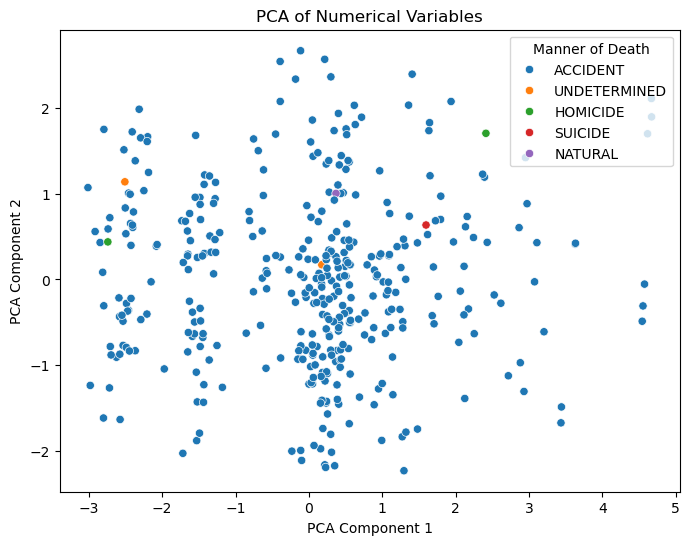

In [ ]:
# dropping na scaling data
scaler = StandardScaler()
numeric_df_clean = numeric_df.dropna()
scaled_data = scaler.fit_transform(numeric_df_clean)

# creating PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# plotting PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df.loc[numeric_df_clean.index, 'Manner of Death'])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Numerical Variables")
plt.show()

#### Interpretation

#### KMeans

c:\Users\bdscu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\bdscu\AppData\Local\Temp\ipykernel_24868\1473155488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df_clean['Cluster'] = kmeans.labels_


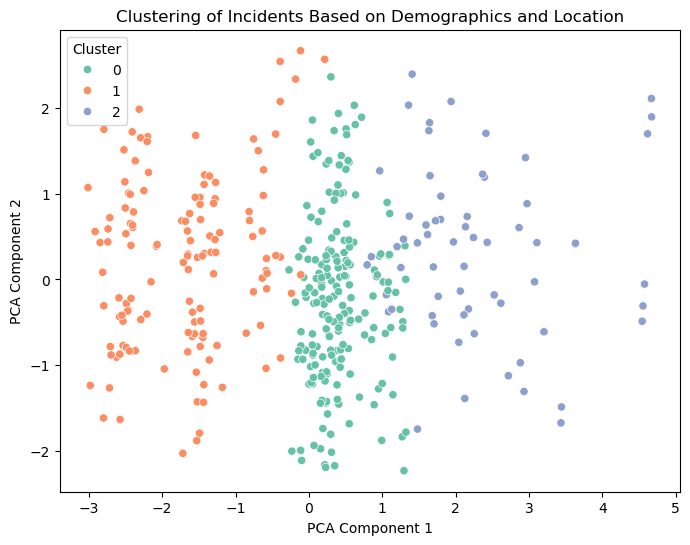

In [ ]:
# creating kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)

# adding labels to Cluster column in dataframe
numeric_df_clean['Cluster'] = kmeans.labels_

# plotting clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=numeric_df_clean['Cluster'], palette="Set2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustering of Incidents Based on Demographics and Location")
plt.show()

#### Interpretation
!!!! CHECK WARNING LATER

In [ ]:
# Create columns for day of the week and time of day
df_copy['Day of Week'] = pd.to_datetime(df_copy['Date of Incident'], errors='coerce').dt.day_name()
df_copy['Hour'] = pd.to_datetime(df_copy['Date of Incident'], errors='coerce').dt.hour
df_copy['Time of Day'] = pd.cut(
    df_copy['Hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# Visualize the distribution of deaths by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Deaths by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()

NameError: name 'pd' is not defined

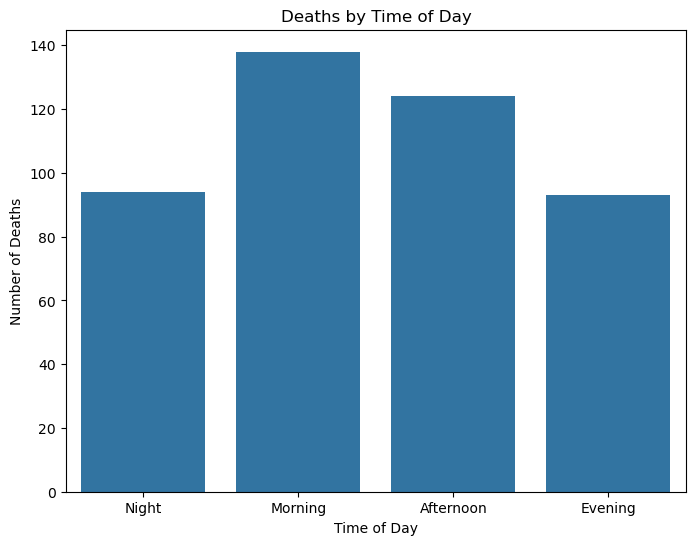

In [ ]:
# Visualize the distribution of deaths by time of day
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='Time of Day')
plt.title("Deaths by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Deaths")
plt.show()

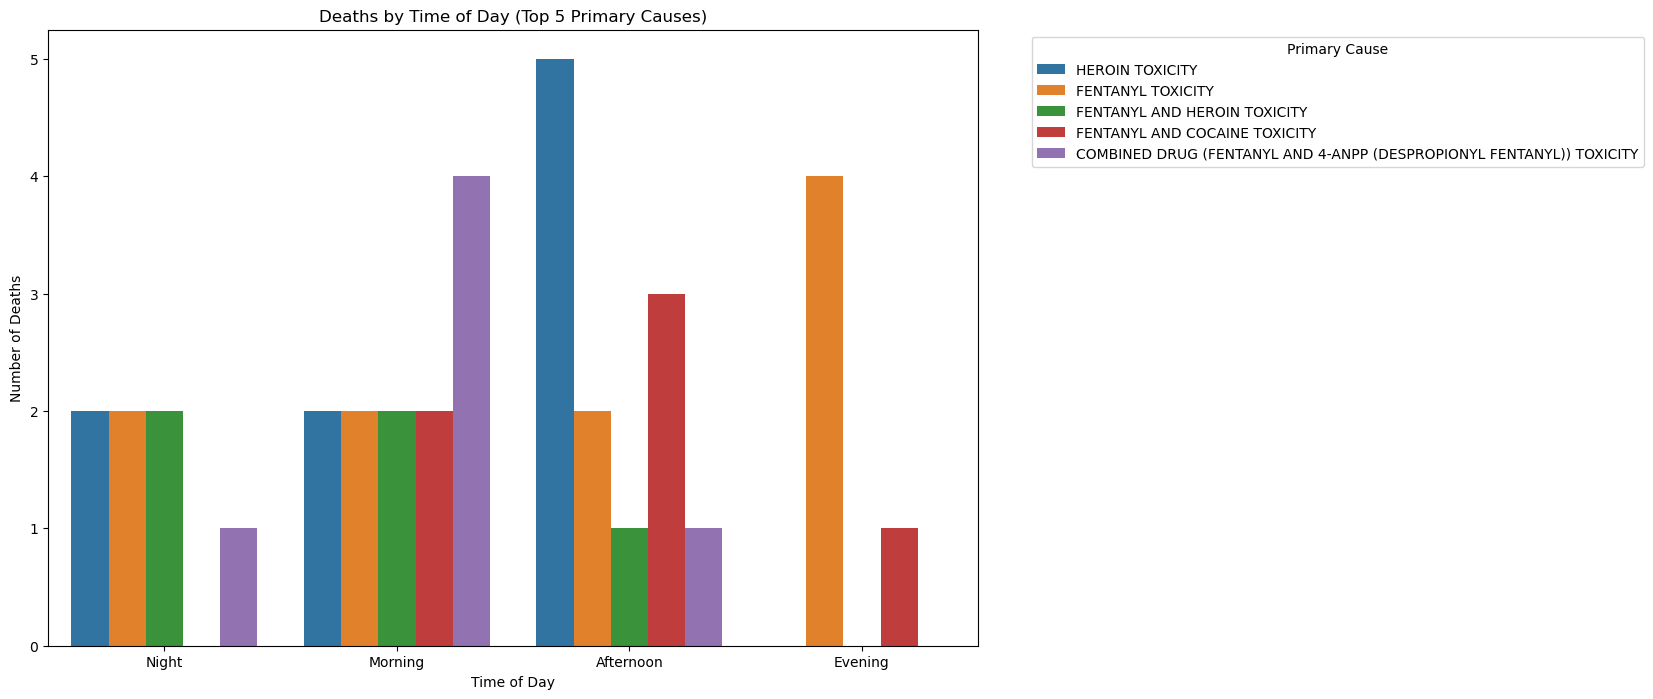

In [ ]:
# Restrict 'Primary Cause' to the top 5 most frequent categories
top_primary_causes = df_copy['Primary Cause'].value_counts().head(5).index
filtered_primary_cause_df = df_copy[df_copy['Primary Cause'].isin(top_primary_causes)]

# Advanced Time of Day Analysis with Restricted Data
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_primary_cause_df, x='Time of Day', hue='Primary Cause', dodge=True)
plt.title("Deaths by Time of Day (Top 5 Primary Causes)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Deaths")
plt.legend(title="Primary Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

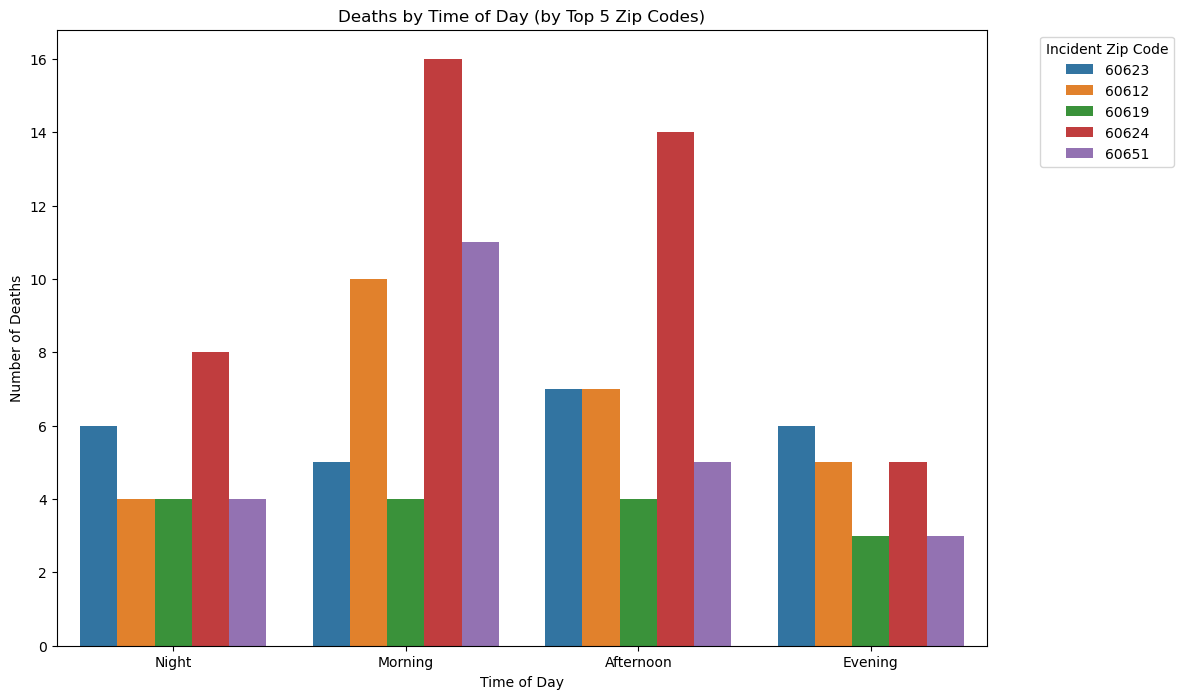

In [ ]:
# Top 5 Zip Codes for Time of Day Analysis
top_zip_codes = df_copy['Incident Zip Code'].value_counts().head(5).index  # Focus on top 5 zip codes
filtered_zip_df = df_copy[df_copy['Incident Zip Code'].isin(top_zip_codes)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_zip_df, x='Time of Day', hue='Incident Zip Code', dodge=True)
plt.title("Deaths by Time of Day (by Top 5 Zip Codes)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Deaths")
plt.legend(title="Incident Zip Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Filter for drug-related deaths based on 'Primary Cause'
drug_related_df = df_copy[df_copy['Primary Cause'].str.contains('drug|overdose', case=False, na=False)]

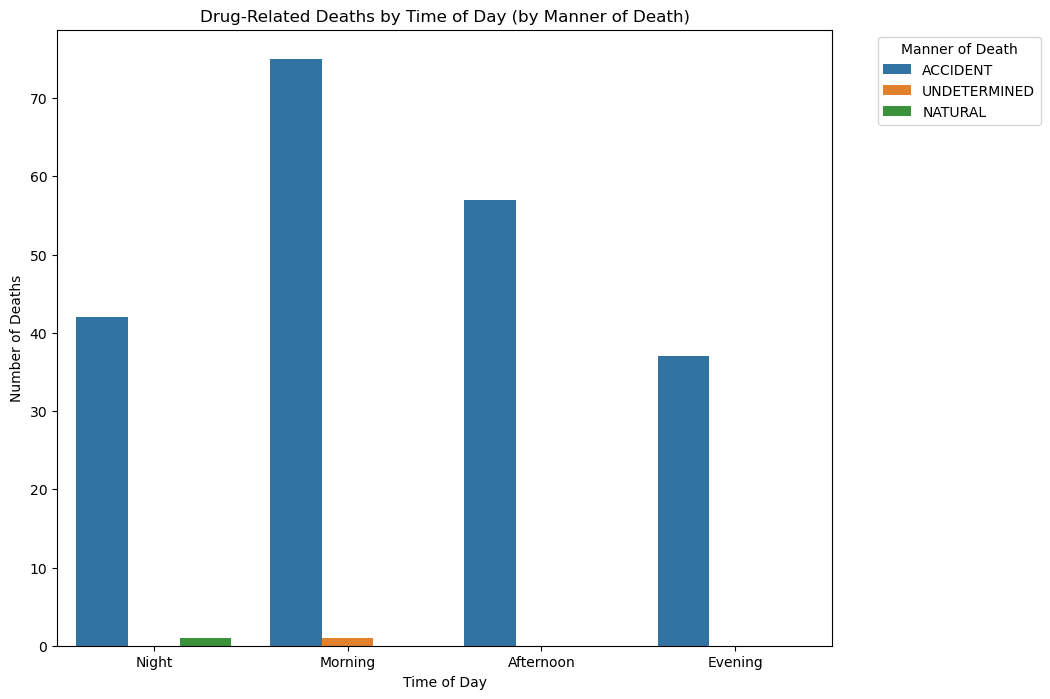

In [ ]:
# Time of Day Analysis for Drug-Related Deaths
plt.figure(figsize=(10, 8))
sns.countplot(data=drug_related_df, x='Time of Day', hue='Manner of Death', dodge=True)
plt.title("Drug-Related Deaths by Time of Day (by Manner of Death)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Deaths")
plt.legend(title="Manner of Death", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Drug-Related Deaths by Time of Day (by Manner of Death):
Most deaths occur during the "Night" period, with a notable proportion classified as Accidents.
Suicides and Undetermined cases are also present but less frequent.

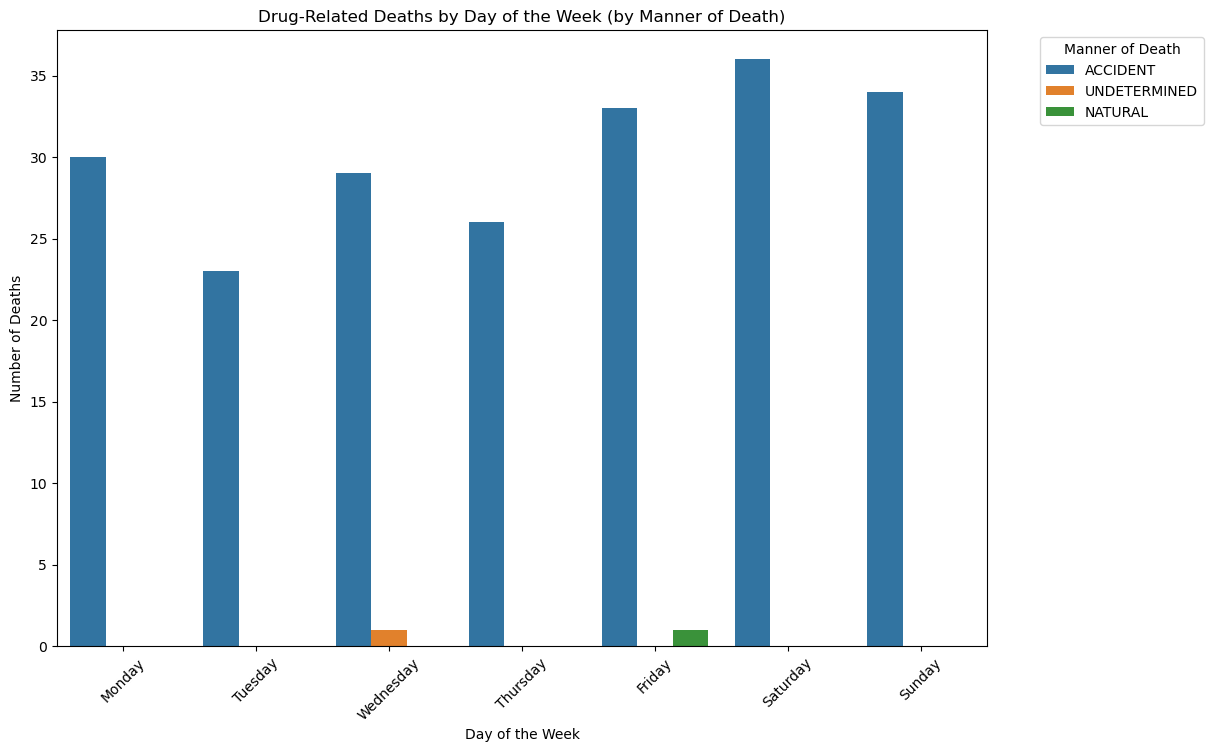

In [ ]:
# Day of the Week Analysis for Drug-Related Deaths
plt.figure(figsize=(12, 8))
sns.countplot(data=drug_related_df, x='Day of Week', hue='Manner of Death',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Drug-Related Deaths by Day of the Week (by Manner of Death)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Deaths")
plt.legend(title="Manner of Death", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

2. Drug-Related Deaths by Day of the Week (by Manner of Death):
Mondays show a higher frequency of drug-related deaths, followed by other weekdays.
Accidents dominate across all days, reflecting the unintentional nature of many drug-related deaths.


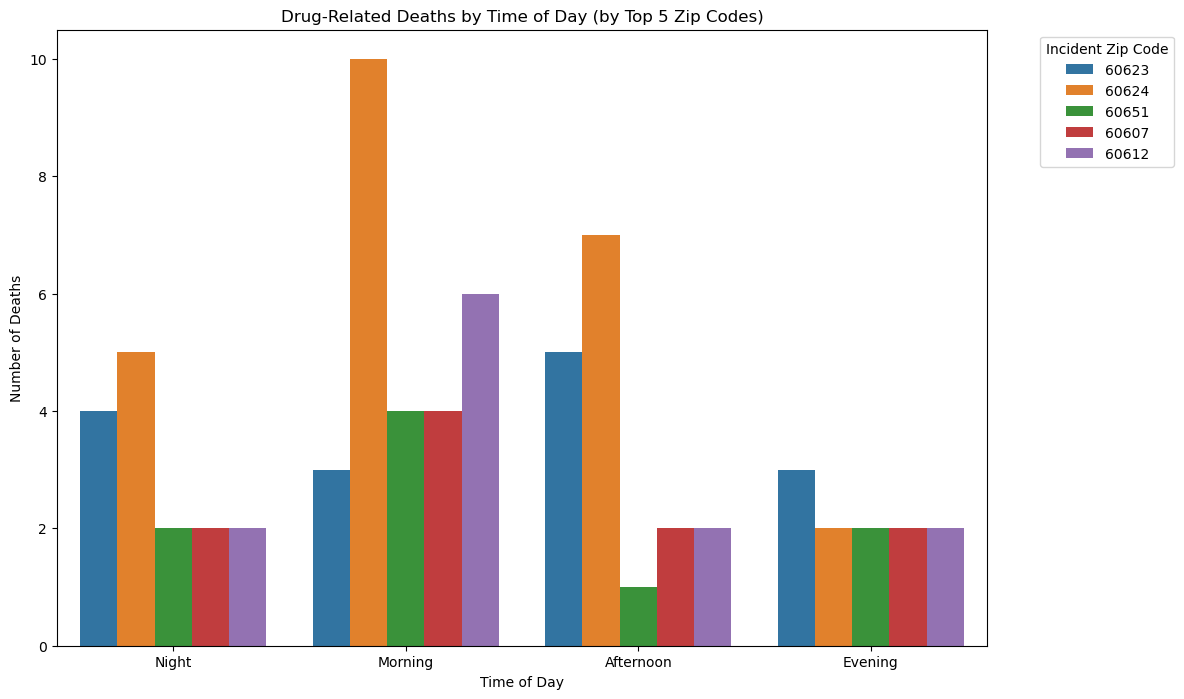

In [ ]:
# Top 5 Zip Codes Analysis for Drug-Related Deaths
top_zip_codes_drug = drug_related_df['Incident Zip Code'].value_counts().head(5).index
filtered_zip_drug_df = drug_related_df[drug_related_df['Incident Zip Code'].isin(top_zip_codes_drug)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_zip_drug_df, x='Time of Day', hue='Incident Zip Code', dodge=True)
plt.title("Drug-Related Deaths by Time of Day (by Top 5 Zip Codes)")
plt.xlabel("Time of Day")
plt.ylabel("Number of Deaths")
plt.legend(title="Incident Zip Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. Drug-Related Deaths by Top 5 Zip Codes (by Time of Day):
Nighttime is the riskiest period for drug-related deaths across the top 5 zip codes.
Certain zip codes also have spikes in deaths during the Afternoon or Evening.
